# Integrating Embeddings with Queries in an Information Retrieval System

## Objective

In this exercise, we will learn how to integrate embeddings with a query to enhance an Information Retrieval (IR) system. We will use both static and contextual embeddings to generate representations of queries and documents, compute their similarities, and rank the documents based on relevance to the query.

---

## Stages Covered

1. **Introduction to Pre-trained Transformer Models**
   - Load and use BERT for contextual embeddings.
   - Load and use Word2Vec for static embeddings.

2. **Generating Text Embeddings**
   - Generate embeddings for queries and documents using BERT.
   - Generate embeddings for queries and documents using Word2Vec.

3. **Computing Similarity Between Embeddings**
   - Compute cosine similarity between query and document embeddings.
   - Rank documents based on similarity scores.

4. **Integrating Embeddings with Queries**
   - Practical implementation of embedding-based retrieval for a given text corpus.

---

## Prerequisites

- TensorFlow
- Hugging Face's Transformers library
- Gensim library
- Scikit-learn library
- A text corpus in the `../data` folder

---

## Exercise

Follow the steps below to integrate embeddings with a query and enhance your IR system.



Step 0: Verify requirements:

* tensorflow
* transformers
* scikit-learn
* matplotlib
* seaborn

Step 1: Download dataset from Kaggle

URL: https://www.kaggle.com/datasets/zynicide/wine-reviews

In [1]:
import kaggle
import pandas as pd

kaggle.api.dataset_download_cli(dataset='zynicide/wine-reviews')



Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
License(s): CC-BY-NC-SA-4.0
wine-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir data
!unzip wine-reviews.zip -d data

In [2]:
wine_df = pd.read_csv('data/winemag-data_first150k.csv')
print(wine_df.head())
corpus = wine_df['description']

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

Step 2: Load a Pre-trained Transformer Model

Use the BERT model for generating contextual embeddings and Word2Vec for static embeddings.

In [3]:
import tensorflow as tf

2024-07-06 21:22:30.798225: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 21:22:36.053436: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 21:22:48.026849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 21:22:53.382598: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 21:22:53.387640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-06 21:22:55.070001: I tensorflow/core/platform/cpu_feature_guard.cc:

In [4]:
import gensim.downloader as api

In [5]:
from transformers import BertTokenizer, TFBertModel

/home/jeffersonc/Documentos/RecuperacionInformacion/envir/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Load pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

In [7]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

2024-07-06 21:25:12.967708: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
2024-07-06 21:25:13.212842: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
2024-07-06 21:25:14.636685: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
2024-07-06 21:25:35.769544: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from

Step 3: Generate Text Embeddings

Static Embeddings with Word2Vec

In [89]:
import numpy as np
import time
def generate_word2vec_embeddings(texts):
    start_time = time.time()
    embeddings = []
    for text in texts:
        tokens = text.lower().split()
        word_vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
        if word_vectors:
            embeddings.append(np.mean(word_vectors, axis=0))
        else:
            embeddings.append(np.zeros(word2vec_model.vector_size))
    total_time = time.time() - start_time
    print(f"Word2vec Proceso completado en {total_time:.2f} segundos")
    return np.array(embeddings)

word2vec_embeddings = generate_word2vec_embeddings(corpus[:100])
#print("Word2Vec Embeddings:", word2vec_embeddings)
#print("Word2Vec Shape:", word2vec_embeddings.shape)

Word2vec Proceso completado en 0.02 segundos


Contextual Embeddings with BERT

In [56]:
import time

def generate_bert_embeddings(texts):
    start_time = time.time()
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='tf', padding=True, truncation=True)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :])  # Use [CLS] token representationasdasd
    print("TIme: ",time.time()-start_time)
    return np.array(embeddings).transpose(0,2,1)

bert_embeddings = generate_bert_embeddings(corpus[:50])


TIme:  105.76367235183716


In [64]:
print("BERT Embeddings:", bert_embeddings)
print("Word2Vec Shape:", bert_embeddings.shape)

BERT Embeddings: [[[ 0.11967453]
  [-0.48856777]
  [ 0.36453053]
  ...
  [-0.4368052 ]
  [ 0.11976132]
  [ 0.18947811]]

 [[-0.05186653]
  [-0.3650648 ]
  [ 0.6474592 ]
  ...
  [-0.31474525]
  [ 0.05560128]
  [ 0.5154337 ]]

 [[-0.73173183]
  [ 0.35088512]
  [-0.01913831]
  ...
  [-0.03388368]
  [ 0.22656566]
  [ 0.3079806 ]]

 ...

 [[-0.3723562 ]
  [-0.45143443]
  [ 0.22031534]
  ...
  [-0.08128701]
  [ 0.18034054]
  [ 0.3327191 ]]

 [[-0.2377052 ]
  [-0.03105041]
  [ 0.53624666]
  ...
  [-0.13815284]
  [ 0.11723231]
  [ 0.45308188]]

 [[-0.65289634]
  [ 0.19260146]
  [ 0.14950942]
  ...
  [-0.5081792 ]
  [ 0.23707682]
  [ 0.17229895]]]
Word2Vec Shape: (50, 768, 1)


Ejecución por lotes, así optimizamos el código pondremos un ejemplo como prueba

In [79]:
def process_text_for_bert(text):
    try:
        inputs = tokenizer(text, return_tensors='tf', padding=True, truncation=True)
        outputs = model(inputs)
        embedding = outputs.last_hidden_state[:, 0, :].numpy()
        return embedding
    except Exception as e:
        print(f"Error procesando texto: {str(e)}")
        return None

def process_batch(texts):
    return [process_text_for_bert(text) for text in texts]


corpus_new = corpus[:10] # Reemplaza esto con tu corpus real
batch_size = 5  

start_time = time.time()

results = []

for i in range(0, len(corpus_new), batch_size):
    batch = corpus_new[i:i+batch_size]
    batch_results = process_batch(batch)
    results.extend(batch_results)
    print(f"Procesado lote {i//batch_size + 1}/{(len(corpus)-1)//batch_size + 1}")

total_time = time.time() - start_time
print(f"Proceso completado en {total_time:.2f} segundos")
print(f"Número de embeddings generados: {len(results)}")

Procesado lote 1/15093
Proceso completado en 4.61 segundos
Número de embeddings generados: 10


Como podemos observar, se demora 16 seg, mientras que hacerlo mediante el anterior codigo tomo 105 segundos.

In [80]:
bert_embeddings2=np.array(results).transpose(0,2,1)

Step 4: Compute Similarity Between Embeddings

Use the scikit-learn library.

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity between Word2Vec embeddings
word2vec_similarity = cosine_similarity(word2vec_embeddings)
print("Word2Vec Cosine Similarity:\n", word2vec_similarity)

# Cosine similarity between BERT embeddings
bert_similarity = cosine_similarity(bert_embeddings2.reshape(10,768))
print("BERT Cosine Similarity:\n", bert_similarity)

Word2Vec Cosine Similarity:
 [[1.         0.8253629  0.80511177 0.8419133  0.83916086 0.83854574
  0.8216922  0.8248522  0.84638995 0.8140328 ]
 [0.8253629  1.0000004  0.7915441  0.8704564  0.70442986 0.8919624
  0.85559994 0.9090055  0.82102585 0.8199145 ]
 [0.80511177 0.7915441  0.99999976 0.7813313  0.7663708  0.81088406
  0.76002795 0.7869289  0.7806283  0.82849413]
 [0.8419133  0.8704564  0.7813313  0.99999964 0.7388937  0.8769778
  0.8692663  0.86583847 0.8299481  0.81447786]
 [0.83916086 0.70442986 0.7663708  0.7388937  0.9999998  0.7408403
  0.7264281  0.7543802  0.84104794 0.73225087]
 [0.83854574 0.8919624  0.81088406 0.8769778  0.7408403  1.0000001
  0.86410356 0.9094129  0.8474779  0.8254898 ]
 [0.8216922  0.85559994 0.76002795 0.8692663  0.7264281  0.86410356
  0.99999976 0.87098914 0.8183166  0.7882399 ]
 [0.8248522  0.9090055  0.7869289  0.86583847 0.7543802  0.9094129
  0.87098914 0.9999997  0.86063915 0.83889055]
 [0.84638995 0.82102585 0.7806283  0.8299481  0.84104794

Step 5: Compare Contextual and Static Embeddings

Analyze and compare the similarity results from both BERT and Word2Vec embeddings.

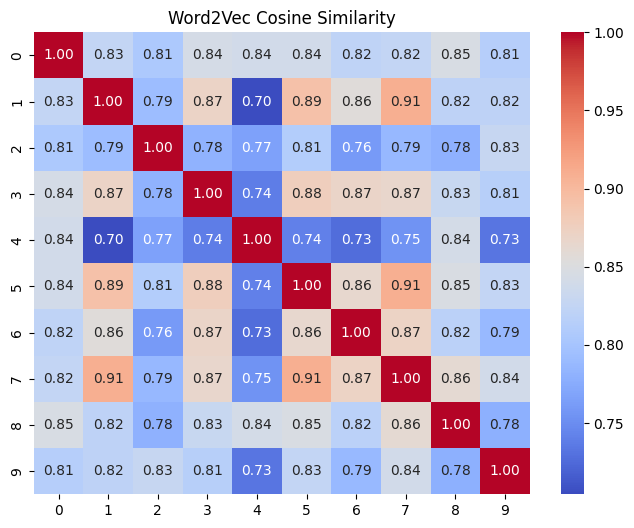

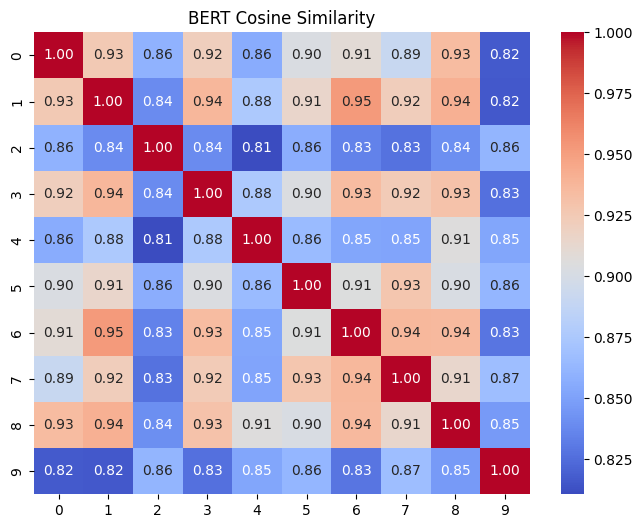

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(matrix, title, figsize=(8, 6), annotation=True):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=annotation, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

plot_similarity_matrix(word2vec_similarity, "Word2Vec Cosine Similarity")
plot_similarity_matrix(bert_similarity, "BERT Cosine Similarity")

Step 6: Applying to Corpus

In [90]:
def generate_bert_embeddings_optimized(corpus_new):
    start_time = time.time()
    for i in range(0, len(corpus_new), batch_size):
        batch = corpus_new[i:i+batch_size]
        batch_results = process_batch(batch)
        results.extend(batch_results)
    total_time = time.time() - start_time
    print(f"bert vectorized Proceso completado en {total_time:.2f} segundos")
    return np.array(results).transpose(0,2,1)


In [91]:
# Generate embeddings for the corpus
corpus_word2vec_embeddings = generate_word2vec_embeddings(corpus)


# Compute similarity for the corpus
#corpus_word2vec_similarity = cosine_similarity(corpus_word2vec_embeddings)
#corpus_bert_similarity = cosine_similarity(corpus_bert_embeddings.reshape(corpus_bert_embeddings.shape[:2]))

# Plot similarity matrices
#plot_similarity_matrix(corpus_word2vec_similarity, "Corpus Word2Vec Cosine Similarity", figsize=(16, 12), annotation=False)
#plot_similarity_matrix(corpus_bert_similarity, "Corpus BERT Cosine Similarity", figsize=(16, 12), annotation=False)

Word2vec Proceso completado en 335.70 segundos


In [93]:
batch_size = 5  
corpus_bert_embeddings = generate_bert_embeddings_optimized(corpus)

Summary

So far, in this exercise, you learned how to:

* Load a pre-trained transformer model (BERT) and a static embedding model (Word2Vec).
* Generate text embeddings using these models.
* Compute cosine similarity between embeddings.
* Compare the similarity results from both contextual and static embeddings.

Now you have a practical understanding of how transformers and embeddings can be used in Information Retrieval systems.

Let's integrate query search.

Step 7: Generate Embeddings for the Query

Generate embeddings for the query using the same model used for the documents.

Step 8: Compute Similarity Between Query and Documents

Compute the similarity between the query embedding and each document embedding.

Step 9: Retrieve and Rank Documents Based on Similarity Scores

Retrieve and rank the documents based on their similarity scores to the query.